[  49   59  146  157  859  863  952  964 1052 1060 1451 1460 1547 1559
 2354 2365 2453 2462 2853 2860]
ISS Rises at 2024-03-21 10:49:00+08:00
ISS Sets at 2024-03-21 10:59:00+08:00


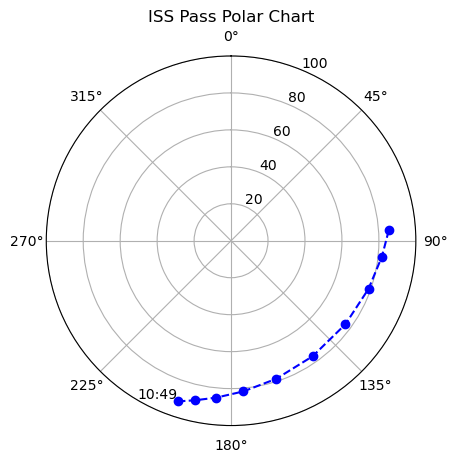

In [51]:
# Step 1: Import Required Libraries
from skyfield.api import load, wgs84
from pytz import timezone
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load TLE Data for ISS
station_data = load.tle('https://celestrak.com/NORAD/elements/stations.txt')
iss = station_data['ISS (ZARYA)']

# Step 3: Define Observer Location (Port Hedland, Australia)
ts = load.timescale()
observer = wgs84.latlon(-20.3123, 118.64498)

# Step 4: Define Time Range (2 Days)
minutes = np.arange(60 * 24 * 2)  # Use NumPy array
time_range = ts.utc(2024, 3, 21, 2, minutes)

# Step 5: Compute Altitude, Azimuth, and Distance
orbit = (iss - observer).at(time_range)

altitude, azimuth, distance = orbit.altaz()

# Step 6: Identify Visible Passes (When Altitude > 0)
visible_pass = altitude.degrees > 0
indices, = np.where(visible_pass)  # Find times when ISS is visible
boundaries, = np.where(np.diff(visible_pass.astype(int)))  # Find rise and set times
print(boundaries)
# Step 7: Ensure Even Pairs of Boundaries
if len(boundaries) % 2 != 0:
    boundaries = boundaries[:-1]  # Drop last boundary if odd count

# Step 8: Reshape Boundaries into Pairs (Rise & Set Times)
passes = boundaries.reshape(-1, 2)  # Automatically adjust for pairs

# Step 9: Select First Pass for Visualization
if len(passes) > 0:
    pass_to_observe = 0  # Change to view a different pass
    rise, set = passes[pass_to_observe]

    # Step 10: Convert Time to Local Time Zone
    time_zone = timezone('Australia/Perth')
    print(f'ISS Rises at {time_range[rise].astimezone(time_zone)}')
    print(f'ISS Sets at {time_range[set].astimezone(time_zone)}')

    # Step 11: Create Polar Plot
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    plt.title("ISS Pass Polar Chart")
    ax.set_rlim([0, 100])
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)

    θ = azimuth.radians
    r = 90 - altitude.degrees
    ax.plot(θ[rise:set], r[rise:set], 'bo--')

    # Add Time Labels to Plot
    for k in range(rise, set, 10):  # Skip some points for clarity
        text = time_range[k].astimezone(time_zone).strftime('%H:%M')
        ax.text(θ[k], r[k], text, ha='right', va='bottom')

    plt.show()
else:
    print("No visible ISS passes found in the given time range.")
